In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Assignment 5.3

Solving the Ising model in 2 dimensions using the algorithm of Metropolis et al.

The hamiltonian for the system is given by: $$H = -J \sum_{\alpha\beta}S_{\alpha}S_{\beta} - B \sum_{\alpha}S_{\alpha}$$
We use Metropolis algorithm to sweep over the lattice sites and flip the spins with a probability of $\omega(s) = \frac{e^{-\beta H(s)}}{Z}$ which is $$r=\frac{e^{H_s}/Z}{e^{H}/Z} = e^{-2S_{\alpha}(Jf+B)}$$

In [5]:
def create_lattice(N): 
    # Function for creating a 2d lattice with randomly placed up and down spins, for a given number of spins on 
    # side N
    return(2*np.random.randint(2, size=(N,N))-1)

In [6]:
create_lattice(10)

array([[ 1, -1,  1,  1, -1,  1, -1, -1, -1, -1],
       [-1,  1,  1,  1, -1,  1,  1, -1, -1,  1],
       [-1,  1, -1, -1, -1,  1, -1,  1, -1, -1],
       [ 1,  1,  1,  1, -1, -1,  1,  1, -1, -1],
       [-1,  1, -1,  1,  1,  1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1, -1,  1,  1,  1, -1],
       [-1,  1,  1, -1,  1, -1,  1, -1, -1, -1],
       [-1,  1, -1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1, -1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1]])

In [4]:
def one_sweep(ar,N,J,B,beta):
    #function for one-sweep over the lattice 'ar' with N*N number of spins
    for k in range(N*N):
        i = np.random.randint(0,N) #randomly choosing lattice sites for spin flipping
        j = np.random.randint(0,N)
        s = ar[i,j] #spin value at the site
        f = ar[(i+1)%N,j] + ar[i,(j+1)%N]+ar[(i-1)%N,j]+ar[i,(j-1)%N]
        r = np.exp(-2*s*beta*(J*f + B))
        
        if (r > np.random.rand()):
            ar[i,j] = -1*s


In [5]:
def energy(ar,N,J,B,beta):
    # function for calculating the energy of interactions in the given lattice 'ar'
    en = 0 
    for i in range(N):
        for j in range(N):
            f = ar[(i+1)%N,j] + ar[i,(j+1)%N]+ar[(i-1)%N,j]+ar[i,(j-1)%N]
            s = ar[i,j]
            en -= s*(J*f+B)
    return(en/4)
            

In [7]:
def energy2(ar,N,J,B,beta):
    en = 0
    for i in range(N):
        for j in range(N):
            f = ar[(i+1)%N,j] + ar[i,(j+1)%N]+ar[(i-1)%N,j]+ar[i,(j-1)%N]
            s = ar[i,j]
            en += -s*(J*f+B)/4
            
    return(en**2/N**2)
            

In [13]:
energy(create_lattice(20),10,1,1,1)

-8.0

In [6]:
def magnetisation(N,ar):
    # function for calculating the average magnetisation of spins in the given lattice 'ar'
    return(np.sum(ar))

In [10]:
def mag2(N,ar):
    return((np.sum(ar)**2)/N**2)

Allowing the system to thermalize for 10 iterations (chosen after trial testing)

In [17]:
n_therm = 10
M = np.zeros(n_therm)
J = 1
B = 1
lattice = create_lattice(20)
for k in range(n_therm):
    one_sweep(lattice,20,J,B,1)
    M[k] = magnetisation(20,lattice)

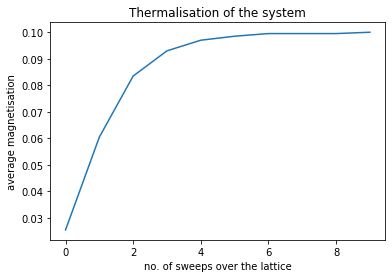

In [14]:
plt.plot(M/(n_therm*20**2))
plt.title("Thermalisation of the system")
plt.ylabel("average magnetisation")
plt.xlabel("no. of sweeps over the lattice")
plt.show()

In [18]:
n_avg = 100 #number of sweeps 
t_nos = 100 #number of temperature steps
N=20
T = np.linspace(1,8,t_nos) # temperature steps
m = np.zeros(t_nos) #magnetisation
E = np.zeros(t_nos) # energy
X = np.zeros(t_nos) # susceptibily
C = np.zeros(t_nos) # specific heat capacity
for l in range(t_nos):
    m1,m2,e1,e2 = 0,0,0,0
    m11,e11 = 0,0
    for k in range(n_avg):
        one_sweep(lattice,N,J,B,1/T[l])
        m11 = magnetisation(N,lattice)
        e11 = energy(lattice,N,J,B,1/T[l])
       
        m1 += m11
        e1 += e11
        m2 += m11**2
        e2 += e11**2
    m[l] = m1/(n_avg*N**2)
    E[l] = e1/(n_avg*N**2)
    X[l] = ((m2/(n_avg*N**2)) - (m1**2)/(n_avg*n_avg*N**2))/T[l]
    C[l] = ((e2/(n_avg*N**2)) - (e1**2)/(n_avg*n_avg*N**2))/T[l]**2

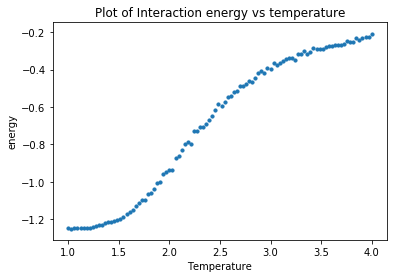

In [29]:
plt.scatter(np.linspace(1,4,100),E, s = 10)
plt.title("Plot of Interaction energy vs temperature")
plt.ylabel("energy")
plt.xlabel("Temperature")
plt.show()

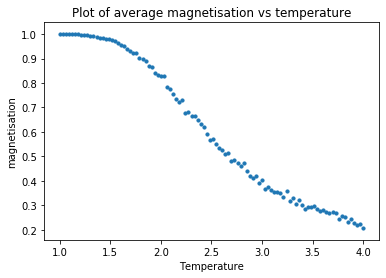

In [30]:
plt.scatter(np.linspace(1,4,t_nos),m, s = 10)
plt.title("Plot of average magnetisation vs temperature")
plt.ylabel("magnetisation")
plt.xlabel("Temperature")
plt.show()

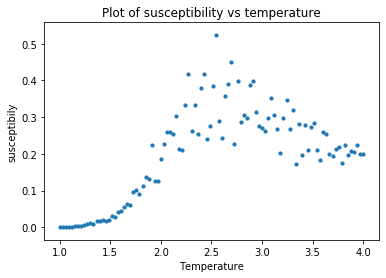

In [31]:
plt.scatter(np.linspace(1,4,t_nos),X, s = 10)
plt.title("Plot of susceptibility vs temperature")
plt.ylabel("susceptibily")
plt.xlabel("Temperature")
plt.show()

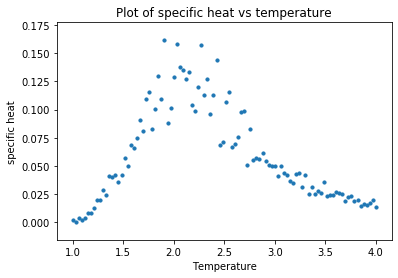

In [32]:
plt.scatter(np.linspace(1,4,t_nos),C, s = 10)
plt.title("Plot of specific heat vs temperature")
plt.ylabel("specific heat")
plt.xlabel("Temperature")
plt.show()

As we can see in the plot for susceptibility and specific heat, these quantities diverge at T~2.5. This is characteristic of a phase transition at these temperatures. 